In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

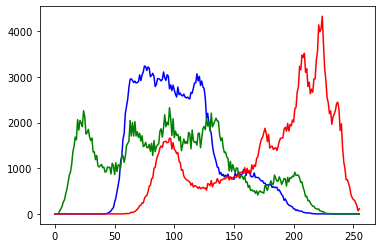

In [9]:
img = cv2.imread('../fig/lenna.bmp', 1)

if img is None:
    print('failed')
    sys.exit()
    
hist_b = cv2.calcHist([img], [0], None,[256],[0, 256])
hist_g = cv2.calcHist([img], [1], None,[256],[0, 256])
hist_r = cv2.calcHist([img], [2], None,[256],[0, 256])


plt.plot(hist_b, color = 'b')
plt.plot(hist_g, color = 'g')
plt.plot(hist_r, color = 'r')
plt.show()

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

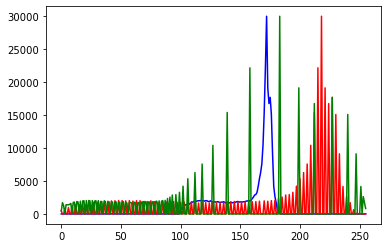

In [19]:
src = cv2.imread('../fig/puppy_shrink.png', 0)

if img is None:
    print('failed')
    sys.exit()
   
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)

dst_norm = np.clip((src - minVal)*255./(maxVal-minVal), 0, 255).astype(np.uint8)
dst_norm1 = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)

dst_equal = cv2.equalizeHist(src)

hist = cv2.calcHist([src], [0], None,[256],[0, 256])
hist_norm = cv2.calcHist([dst_norm], [0], None,[256],[0, 256])
hist_equal = cv2.calcHist([dst_equal], [0], None,[256],[0, 256])

plt.plot(hist, color = 'b')
plt.plot(hist_norm, color = 'r')
plt.plot(hist_equal, color = 'g')
plt.show()

cv2.imshow('src', src)
cv2.imshow('dst_n', dst_norm)
cv2.imshow('dst_n1', dst_norm1)
cv2.imshow('dst_e', dst_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
src = cv2.imread('../fig/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX, -1)
v_equal = cv2.equalizeHist(v)

dst_norm = cv2.merge((h, s, v_norm))
dst_equal = cv2.merge((h, s, v_equal))

dst_norm = cv2.cvtColor(dst_norm, cv2.COLOR_HSV2BGR)
dst_equal = cv2.cvtColor(dst_equal, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('dst_n', dst_norm)
cv2.imshow('dst_e', dst_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [70]:
src = cv2.imread('../fig/palette.png')
# src = cv2.imread('../fig/palette_dark.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    
# dst1 = cv2.inRange(src, (0, 100, 0), (100, 255, 100)) # b, g, r
dst2 = cv2.inRange(src_hsv, (40, 50, 0), (80, 255, 255))  # h, s, v

dst = cv2.copyTo(src, dst2)

cv2.imshow('src', src)
cv2.imshow('dst2', dst2)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [86]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('h_min', 'src')
    hmax = cv2.getTrackbarPos('h_max', 'src')
    
    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('src', dst)
    
src = cv2.imread('../fig/palette.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
cv2.imshow('src', src)
cv2.createTrackbar('h_min', 'src', 50, 179, call_track)
cv2.createTrackbar('h_max', 'src', 100, 179, call_track)


cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [7]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('h_min', 'mask')
    hmax = cv2.getTrackbarPos('h_max', 'mask')
    smin = cv2.getTrackbarPos('s_min', 'mask')
    
    dst = cv2.inRange(src2_hsv, (hmin, smin, 0), (hmax, 255, 255))
    dst = 255-dst
    src1_copy = src1.copy()
    src3 = cv2.copyTo(src2, dst, src1_copy)
    cv2.imshow('mask', dst)
    cv2.imshow('src3', src3)
    
src1 = cv2.imread('../fig/autumn.jpg')
src2 = cv2.imread('../fig/chromakey.png')
src1 = cv2.resize(src1, (1280, 720))
src2 = cv2.resize(src2, (1280, 720))

src2_hsv = cv2.cvtColor(src2, cv2.COLOR_BGR2HSV)
# print(src1.shape)
# print(src2.shape)
# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('src22', src2_hsv)
cv2.namedWindow('mask')
cv2.createTrackbar('h_min', 'mask', 1, 179, call_track)
cv2.createTrackbar('h_max', 'mask', 179, 179, call_track)
cv2.createTrackbar('s_min', 'mask', 1, 255, call_track)



cv2.waitKey()
cv2.destroyAllWindows()

(720, 1280, 3)
(720, 1280, 3)


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
